In [51]:
# procedemos a cargar las librerias para nuestro analisis.
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [52]:
# realizamos la carga de nuestro Dataset.
datacar = pd.read_csv('Car_details_v3.csv')

In [53]:
# En esta linea mostramos los 100 primeros registros para realizar nuestro analisis exploratorio
datacar.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,"Honda City 2017-2020 EXi,2006,158000,140000,Pe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,"Maruti Swift VXI BSIII,2007,130000,120000,Petr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Hyundai Xcent 1.2 VTVT E Plus,2017.0,440000.0,45000.0,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,"Maruti Wagon R LXI DUO BSIII,2007,96000,175000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Maruti 800 DX BSII,2001.0,45000.0,5000.0,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011.0,350000.0,90000.0,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013.0,200000.0,169000.0,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [54]:
# en esta linea revisamos la cantidad de filas y columnas que tiene nuestro Dataset
print(datacar.shape)

(8128, 13)


In [55]:
# en esta linea vamos a revisar el tipo de datos que tenemos en nuestro Dataset
datacar.dtypes

name              object
year             float64
selling_price    float64
km_driven        float64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [58]:
# Lista de columnas que vamos a convertir a datos categóricos
columnas_a_convertir = ['fuel', 'seller_type','transmission','owner','mileage','engine','max_power','torque']
for columna in columnas_a_convertir:
    datacar[columna] = datacar[columna].astype('category')

In [59]:
# la siguiente linea lo que hace es obtener un resumen estadístico de nuestro Dataset.
datacar.describe()

,year,selling_price,km_driven,seats
count,7787.000000,7.787000e+03,7.787000e+03,7566.000000
mean,2014.054193,6.566975e+05,6.840663e+04,5.422284
std,3.911379,8.174188e+05,5.663441e+04,0.955162
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.750000e+05,3.300150e+04,5.000000
50%,2015.000000,4.599990e+05,6.000000e+04,5.000000
75%,2017.000000,6.965000e+05,9.000000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Text(0.5, 1.0, 'Identificación de datos faltantes y atipicos')

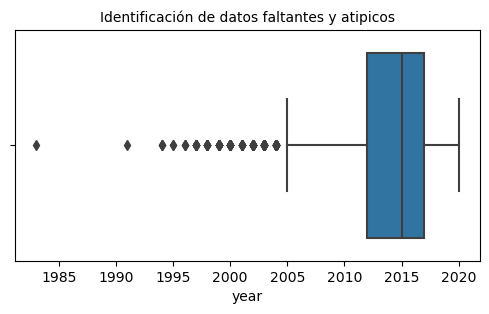

In [60]:
# las siguientes lineas nos permiten identificar los datos faltantes y atipicos
plt.figure(figsize=(6,3))
sns.boxplot (x=datacar['year'])
plt.title('Identificación de datos faltantes y atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes y atipicos')

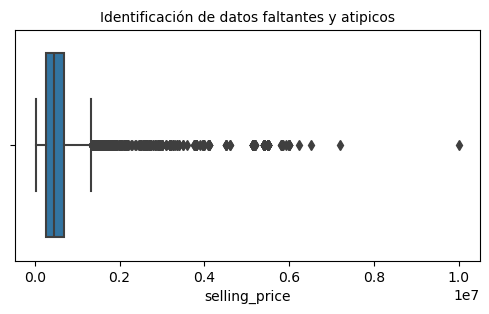

In [61]:
# las siguientes lineas nos permiten identificar los datos faltantes y atipicos
plt.figure(figsize=(6,3))
sns.boxplot (x=datacar['selling_price'])
plt.title('Identificación de datos faltantes y atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes y atipicos')

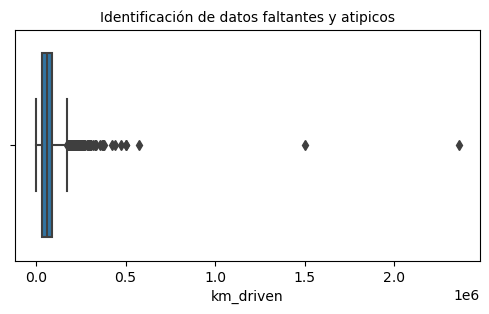

In [24]:
# las siguientes lineas nos permiten identificar los datos faltantes y atipicos
plt.figure(figsize=(6,3))
sns.boxplot (x=datacar['km_driven'])
plt.title('Identificación de datos faltantes y atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes y atipicos')

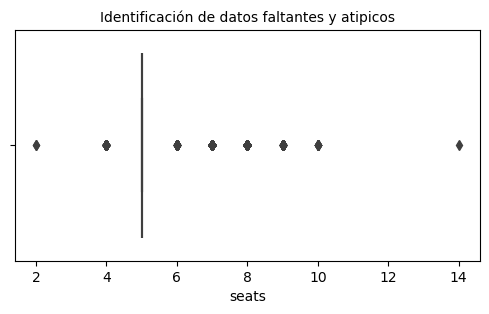

In [25]:
plt.figure(figsize=(6,3))
sns.boxplot (x=datacar['seats'])
plt.title('Identificación de datos faltantes y atipicos', fontsize=10)

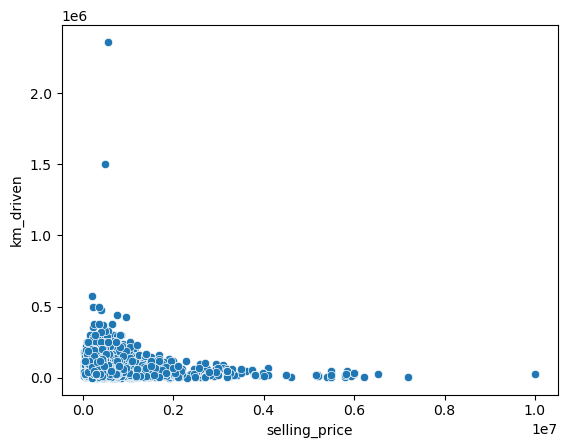

In [63]:
# Relación entre 'precio de venta' y 'km impulsados'
sns.scatterplot(data=datacar, x='selling_price', y='km_driven')
plt.show()

In [66]:

for column in datacar.columns:
    missing_values = datacar[column].isna().sum()
    print("Cantidad de valores faltantes en {}:{}".format(column,missing_values))

Cantidad de valores faltantes en name:0
Cantidad de valores faltantes en year:341
Cantidad de valores faltantes en selling_price:341
Cantidad de valores faltantes en km_driven:341
Cantidad de valores faltantes en fuel:341
Cantidad de valores faltantes en seller_type:341
Cantidad de valores faltantes en transmission:341
Cantidad de valores faltantes en owner:341
Cantidad de valores faltantes en mileage:562
Cantidad de valores faltantes en engine:562
Cantidad de valores faltantes en max_power:556
Cantidad de valores faltantes en torque:563
Cantidad de valores faltantes en seats:562


In [67]:
#con la siguiente linea de código podemos ver la cantidad de valores nulos o faltantes 
datacar.isnull().sum()

name               0
year             341
selling_price    341
km_driven        341
fuel             341
seller_type      341
transmission     341
owner            341
mileage          562
engine           562
max_power        556
torque           563
seats            562
dtype: int64

In [68]:
# Lista de columnas de tipo string
columnas_string = ['fuel', 'seller_type', 'transmission', 'owner','mileage','engine','max_power','torque']
# Ciclo for para reemplazar los valores nulos por la moda en cada columna de tipo string
for columna in columnas_string:
    moda = datacar[columna].mode()[0]  # Encuentra la moda para la columna actual
    datacar[columna].fillna(moda, inplace=True) # Reemplaza los valores nulos por la moda

In [69]:
#lista de columnas de tipo int
columnas_enteras = ['year','selling_price', 'km_driven', 'seats']

# Ciclo for para reemplazar los valores nulos por la media en cada columna de tipo entero
for columna in columnas_enteras:
    media = datacar[columna].mean()  # Calcula la media para la columna actual
    datacar[columna].fillna(media, inplace=True)  # Reemplaza los valores nulos por la media

In [70]:
# revisión de los valores 
for column in datacar.columns:
    missing_values = datacar[column].isna().sum()
    print("Cantidad de valores faltantes en {}:{}".format(column,missing_values))

Cantidad de valores faltantes en name:0
Cantidad de valores faltantes en year:0
Cantidad de valores faltantes en selling_price:0
Cantidad de valores faltantes en km_driven:0
Cantidad de valores faltantes en fuel:0
Cantidad de valores faltantes en seller_type:0
Cantidad de valores faltantes en transmission:0
Cantidad de valores faltantes en owner:0
Cantidad de valores faltantes en mileage:0
Cantidad de valores faltantes en engine:0
Cantidad de valores faltantes en max_power:0
Cantidad de valores faltantes en torque:0
Cantidad de valores faltantes en seats:0


Text(0.5, 1.0, 'Identificación de datos atipicos')

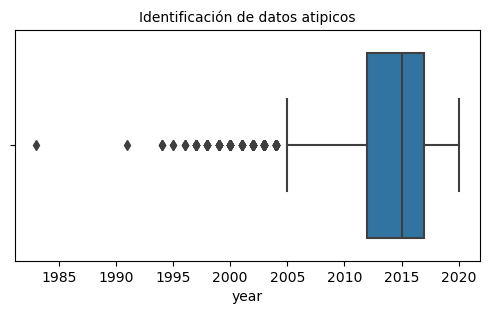

In [32]:
# identificación de datos atipicos para la variable año
plt.figure(figsize=(6,3))
sns.boxplot(x=datacar['year'])
plt.title('Identificación de datos atipicos',fontsize=10)

Text(0.5, 1.0, 'Identificación de datos atipicos')

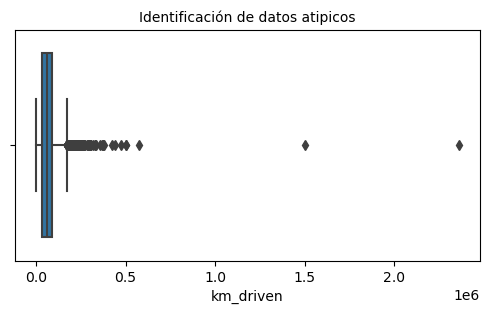

In [71]:
# identificación de datos atipicos para Kilometros 
plt.figure(figsize=(6,3))
sns.boxplot(x=datacar['km_driven'])
plt.title('Identificación de datos atipicos',fontsize=10)

Text(0.5, 1.0, 'Identificación de datos atipicos')

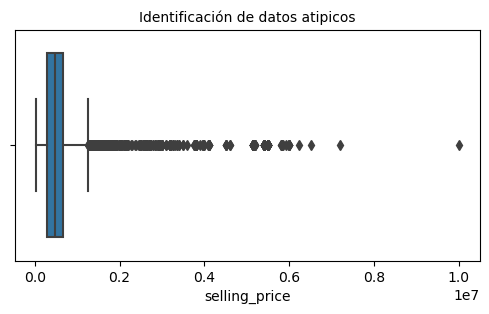

In [34]:
# identificación de datos atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=datacar['selling_price'])
plt.title('Identificación de datos atipicos',fontsize=10)

In [72]:
# Encontrar datos atípicos para la variable año
nivel_minimo = 2000
nivel_maximo = 2021

# Usando 'sum' directamente en la condición booleana para contar los atípicos
Total_Atipicos = sum((datacar['year'] < nivel_minimo) | (datacar['year'] > nivel_maximo))

print(f"El total de los datos atípicos es {Total_Atipicos}")

El total de los datos atípicos es 46


In [73]:
#Encontrar datos atipicos para la variable km driven
nivel_minimo=500
nivel_maximo=260000
Total_Atipicos=((datacar['km_driven']<nivel_minimo)|(datacar['km_driven']>nivel_maximo)).sum()
print(" El total de los datos atipicos es {}".format(Total_Atipicos))

 El total de los datos atipicos es 39


In [74]:
# Encontrar datos atipicos para la variable selling_price
nivel_minimo=10000
nivel_maximo=6000000
Total_Atipicos=((datacar['selling_price']<nivel_minimo)|(datacar['selling_price']>nivel_maximo)).sum()
print(" El total de los datos atipicos es {}".format(Total_Atipicos))

 El total de los datos atipicos es 4


In [75]:
#Información de nuestro Data Set 
datacar.info(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           8128 non-null   object  
 1   year           8128 non-null   float64 
 2   selling_price  8128 non-null   float64 
 3   km_driven      8128 non-null   float64 
 4   fuel           8128 non-null   category
 5   seller_type    8128 non-null   category
 6   transmission   8128 non-null   category
 7   owner          8128 non-null   category
 8   mileage        8128 non-null   category
 9   engine         8128 non-null   category
 10  max_power      8128 non-null   category
 11  torque         8128 non-null   category
 12  seats          8128 non-null   float64 
dtypes: category(8), float64(4), object(1)
memory usage: 443.2+ KB


In [76]:
datacar[['selling_price']].head(100)

,selling_price
0,450000.000000
1,370000.000000
2,656697.467317
3,225000.000000
4,656697.467317
...,...
95,525000.000000
96,600000.000000
97,565000.000000
98,120000.000000


In [77]:
#Paso 3 Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
datacar['selling_price'].value_counts()

selling_price
656697.467317    341
300000.000000    217
600000.000000    212
550000.000000    204
350000.000000    202
                ... 
911999.000000      1
94500.000000       1
408000.000000      1
654000.000000      1
746000.000000      1
Name: count, Length: 669, dtype: int64

In [78]:
# Paso 4 Dividir el Data Set en Train y Testpara evaluar el modelo
datacar = datacar[['selling_price', 'km_driven', 'seats', 'year']]
X = datacar.drop('selling_price',axis=1)
Y = datacar['selling_price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state= 0)

In [79]:
print (X_train)

          km_driven     seats         year
4313   40000.000000  5.000000  2012.000000
5178   68406.631694  5.422284  2014.054193
758    80000.000000  5.000000  2013.000000
7117  100000.000000  9.000000  2016.000000
2606   77000.000000  5.000000  2013.000000
...             ...       ...          ...
4931   70000.000000  5.000000  2012.000000
3264  100000.000000  5.000000  2012.000000
1653   90000.000000  5.000000  2009.000000
2607   90000.000000  5.000000  2012.000000
2732  110000.000000  5.000000  2012.000000

[6096 rows x 3 columns]


In [80]:
print (Y_train)

4313    267000.000000
5178    656697.467317
758     200000.000000
7117    900000.000000
2606    375000.000000
            ...      
4931    300000.000000
3264    220000.000000
1653    170000.000000
2607    375000.000000
2732    225000.000000
Name: selling_price, Length: 6096, dtype: float64


In [81]:
# Paso 5 Entrenamiento del DataSet
modelo_regresion = LinearRegression() # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   
# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [82]:
print (Y_test)

3558     345000.0
233      900000.0
7952     475000.0
572      120000.0
6960    5150000.0
          ...    
2761      70000.0
1487     160000.0
4284     350000.0
5698     380000.0
4643     260000.0
Name: selling_price, Length: 2032, dtype: float64


In [83]:
print (Prediccion)

[ 581413.24668619  652064.79912987 1087359.33597636 ...  461641.31445917
  461641.31445917  659685.56836259]


In [97]:
#paso 6  Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
predicciones = modelo_regresion.predict(X_test)

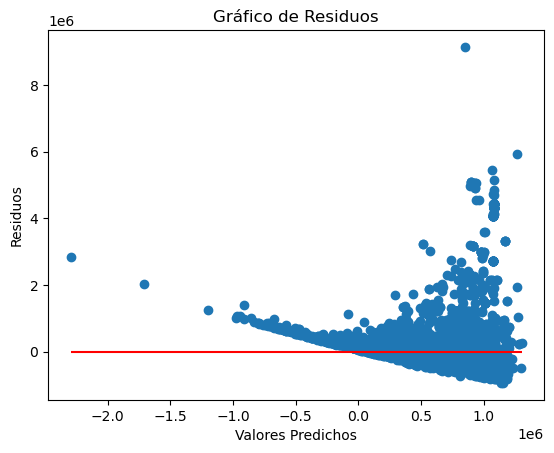

In [92]:
# Representa la diferencia entre los valores observados y los valores predichos por el modelo.
residuos = Y - modelo_regresion.predict(X)
plt.scatter(modelo_regresion.predict(X), residuos)
plt.hlines(y=0, xmin=min(modelo_regresion.predict(X)), xmax=max(modelo_regresion.predict(X)), colors='red')
plt.title('Gráfico de Residuos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()

C:\Users\lukha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


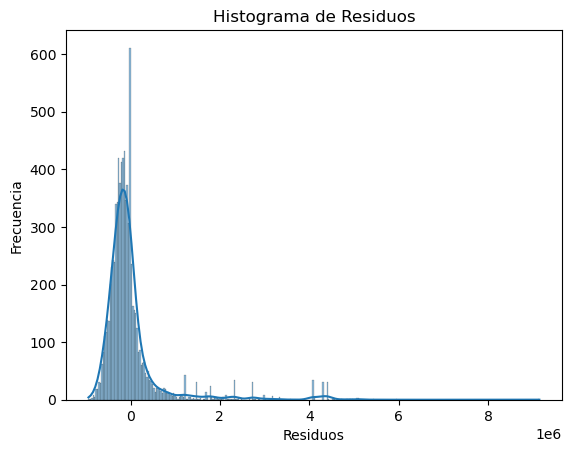

In [95]:
# este histograma  Muestra la distribución de los residuos del modelo.

sns.histplot(residuos, kde=True)
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

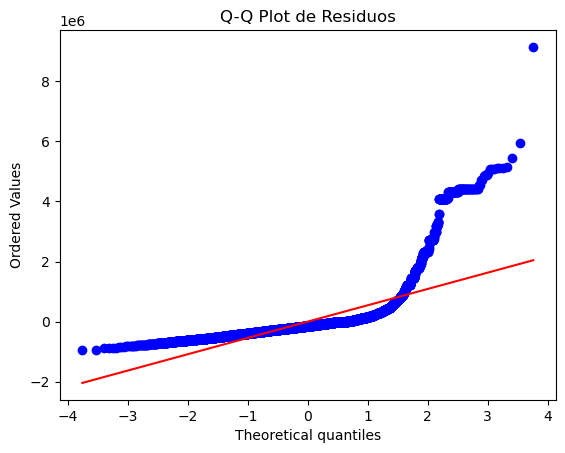

In [96]:
#  Compara la distribución de los residuos con una distribución normal teórica.
import scipy.stats as stats
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot de Residuos')
plt.show()